# Introduction

Before we start loading the data, we must define the background and problem statement that can help us answer the problems in the data. In this introduction part, the background will explain why we are using this dataset and the problem statement will explain what problem we want to solve in the data.

### Latar Belakang
A certain airline has experienced a lower customer retention than usual. the primary suspicion for the low retention is due to low customer satisfaction. As a data scientist for the airline company, we are tasked to predict whether a certain customer would give a good or negative comment based on their satisfaction level. the company provided us with the [Data](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction/data) of a satisfaction survey they recently did. with these data we decided to create a classification model in order to easily and automatically predict whether a customer is satisfied or not and thus will either leave a positive or negative comment about the airline services.

### Problem Statement and Objective

we want to create a prediction model in order to help the airline predict the satisfaction of a customer after using their services to find out whether the customer will leave a positive or negative comment. this model will use the classification method and is done in order help improve the services of the airline in order to achieve an overall 90% customer satisfaction score. This is done by finding factors that affect a customer satisfaction and improving it which will increase customer retention and positive comment which in turn will bring more customers and profits for the airline. this can be done by looking at the result of a satisfaction survey conducted recently. the model will utilize 6 main concept which include decision tree, random forest, support vector machine, K-nearest neighbour, ada boosting, and xgboosting. and for the classification model we choose to analyze the f1 score in the model prediction

# Import Libraries

Before we start the data loading process, we have to import the libraries necessary for the modeling process. The following is the libraries used in the modeling process: 

- we use pandas in order to create the dataframe and also to read the dataset in the form of csv, np is used to process the arrays, and seaborn and matplotlib is used to make the plot and graph especially in the EDA section

- we use sklearn to import the machine learning framework in our prediction model. these include splitting train and test, scaling and encoding, pipeline creation, cross validation, checking the model that is used (dt,rf,knn,svc,ada,xgb), lastly it will help by creating confusion matrix and hyperparameter tuning by finding the result of said prediction before and after hyperparameter tuning

- Winsorizer is used to handle the outliers using the capping method

- phik is used to find the correlation between the target data and the other features

- pickle is used to import the pipeline for inference and deployment purposes

- warning is used to ignore warnings in the data

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score

from feature_engine.outliers import Winsorizer

import phik 
from phik.report import plot_correlation_matrix

import pickle

import warnings
warnings.filterwarnings('ignore')

# Data Loading

The first step is to load the dataset in the form of csv into a dataframe using pandas. we then create a copy of the dataset for manipulation service, so we can still see the original data. lastly we will do some basic data exploration for example checking missing value, finding unique value, create descriptive table, etc


In [2]:
# loading the csv data using panda
data_ori = pd.read_csv('Airplane Dataset.csv') 

In [3]:
# creating a copy of the original dataset for data manipulation
data = data_ori.copy()  
data = pd.DataFrame(data)
data

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [4]:
# checking the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

with these code we can see that there are a total of 103904 data with a total of 25 column in the dataset. despite this arrival delay in minute have 103594 total data, this means that there are possibly missing value present in the arrival delay in minutes column. we can see that most of the dataset is in the form of float or integer apart from gender,customer type, type of travel,and class which is the categorical data. despite this some column such as inflight wifi, ease of online booking, etc is a categorical column which has been encoded. so despite the large amount of integer data, most of it is in the form of a categorical data that has been encoded. the following is the column dataset in its appropriate data type

numerical 

normal : [Age]

skewed : [id, Flight Distance, Departure Delay, Arrival Delay]

categorical

ordinal : [Class, Customer Type, satisfaction]

nominal : [Type Travel, Gender]

encoded : [Wifi, Online Booking, Gate location, Food and drink, Online boarding, Seat comfort, 
           Inflight entertainment, On-board service, Leg room service, Baggage handling, Checkin service, 
           Inflight service, Cleanliness, Time Convenient]

so from this columns we can see that there are some datatype that does not fit the datatype from the data.info

In [5]:
# checking the null value in the dataset
data.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

with this code, we can see that there are 310 null value in the dataset. this means that we need to do missing value handling. since the missing value seems to be only present in arrival delay in minutes and there seems to be no relation between the missing value in arrival delay in minutes with other columns we will assume that the missing value is completely at random (MCAR)

In [6]:
# checking the duplicate value in the dataset
data.duplicated().sum()

0

with this code, we can see that there are no duplicated data. this means that duplicate value handling is not necessary as all data in the dataset is unique

In [7]:
# finding the amount of unique value in the dataset
data.nunique()

Unnamed: 0                           103904
id                                   103904
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3802
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes      

with this code we can see the amount of unique value in the dataset. we can see that unnamed: 0 and id have the same amount of unique value as the amount of data in the dataset. this mean we can drop both unnamed:0 and id as it these column is not necessary as it is only used as a unique identifiers for the individual data 

In [8]:
# dropping the unnamed table from the dataset
data = data.drop('Unnamed: 0', axis=1)

# dropping the id table from the dataset
data = data.drop('id', axis=1)

with this code we delete the column unnamed and id because we dont want to make the id into a feature and we dont need to train these variables

In [9]:
# replacing the target value from string to numerical(0/1)
data.satisfaction = data.satisfaction.replace('neutral or dissatisfied',  0)
data.satisfaction = data.satisfaction.replace('satisfied', 1)

with this code we replace the target variable from string to numerical because the prediction model expect numeric input for variables as numerical value is used to calculate the accuracy, precision, recall, and F1-score of the prediction model

In [10]:
# rename column Type of Travel to Type travel
data = data.rename(columns={'Type of Travel':'Type Travel'})

# rename column Inflight wifi service to Wifi
data = data.rename(columns={'Inflight wifi service':'Wifi'})

# rename column Departure/Arrival time convenient to Time Convenient
data = data.rename(columns={'Departure/Arrival time convenient':'Time Convenient'})

# rename column Ease of Online booking to Online Booking
data = data.rename(columns={'Ease of Online booking':'Online Booking'})

# rename column Departure Delay in Minutes to Departure Delay
data = data.rename(columns={'Departure Delay in Minutes':'Departure Delay'})

# rename column Arrival Delay in Minutes to Arrival Delay
data = data.rename(columns={'Arrival Delay in Minutes':'Arrival Delay'})

with this code we replace these columns name in order to shorten the column name so that the column is easier to call

In [11]:
# viewing the top 10 data in the dataset
data.head(10)

,Gender,Customer Type,Age,Type Travel,Class,Flight Distance,Wifi,Time Convenient,Online Booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay,Arrival Delay,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
5,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,...,1,3,4,4,4,4,1,0,0.0,0
6,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,3,...,2,3,3,4,3,5,2,9,23.0,0
7,Female,Loyal Customer,52,Business travel,Business,2035,4,3,4,4,...,5,5,5,5,4,5,4,4,0.0,1
8,Female,Loyal Customer,41,Business travel,Business,853,1,2,2,2,...,1,1,2,1,4,1,2,0,0.0,0
9,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,3,4,...,2,2,3,4,4,3,2,0,0.0,0


In [12]:
# viewing the bottom 10 data in the dataset
data.tail(10)

,Gender,Customer Type,Age,Type Travel,Class,Flight Distance,Wifi,Time Convenient,Online Booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay,Arrival Delay,satisfaction
103894,Male,Loyal Customer,26,Business travel,Business,712,4,4,4,4,...,5,3,4,4,3,4,5,17,26.0,1
103895,Female,disloyal Customer,24,Business travel,Eco,1055,1,1,1,2,...,1,3,3,5,5,4,1,13,10.0,0
103896,Male,Loyal Customer,57,Business travel,Eco,867,4,5,5,5,...,4,3,4,3,1,3,4,0,0.0,0
103897,Female,Loyal Customer,60,Business travel,Business,1599,5,5,5,5,...,4,4,4,4,4,4,4,9,7.0,1
103898,Male,Loyal Customer,50,Personal Travel,Eco,1620,3,1,3,4,...,2,4,3,4,2,4,2,0,0.0,0
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,0
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,1
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,0
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,0
103903,Male,Loyal Customer,27,Business travel,Business,1723,1,3,3,3,...,1,1,1,4,4,3,1,0,0.0,0


with the code head and tail we can see the top 10 and the bottom 10 data in the dataset. this code could be used to see the first 10 people that answered this survey and and the last 10 people that answered this survey

In [13]:
# viewing the descriptive table of all numeric data in the dataset
data.describe()

,Age,Flight Distance,Wifi,Time Convenient,Online Booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay,Arrival Delay,satisfaction
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000,103904.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678,0.433333
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682,0.495538
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000


with this code we can check the descriptive table from all numeric data in the dataset. by looking at the count row we can see the total data in the dataset (which is mostly 103904). with the mean row we can see the average of each column. the standard deviation column is used to check the spread of the data from the mean. min and max is used to find the minimum and maximum point of the dataset. and lastly the 25%, 50%, and 75% is used to find the the data in said position.

# Exploratory data analysis (EDA)

after loading and cleaning the data, we will move into the Exploratory data analysis or EDA section. the objective of this EDA is to analyze the demographical data and see its relation with our target which is customer satisfaction. we will do so by answering the question that arise from the objective which include the following questions

1. what is the distribution of flight distance among the surveyed customers?
2. does longer flight distance result in less satisfaction?
3. overall, is the airline customers satisfied with our service?
4. Are loyal airline customers more satisfied with our services than disloyal ones?
5. does the younger airline customers tend to be more satisfied with our service than older ones?
6. which class has the highest overall satisfaction?
7. which type of travel is most popular among airline Customers?

## what is the distribution of flight distance among the surveyed customers?

Text(0.5, 1.0, 'Histogram of flight distance')

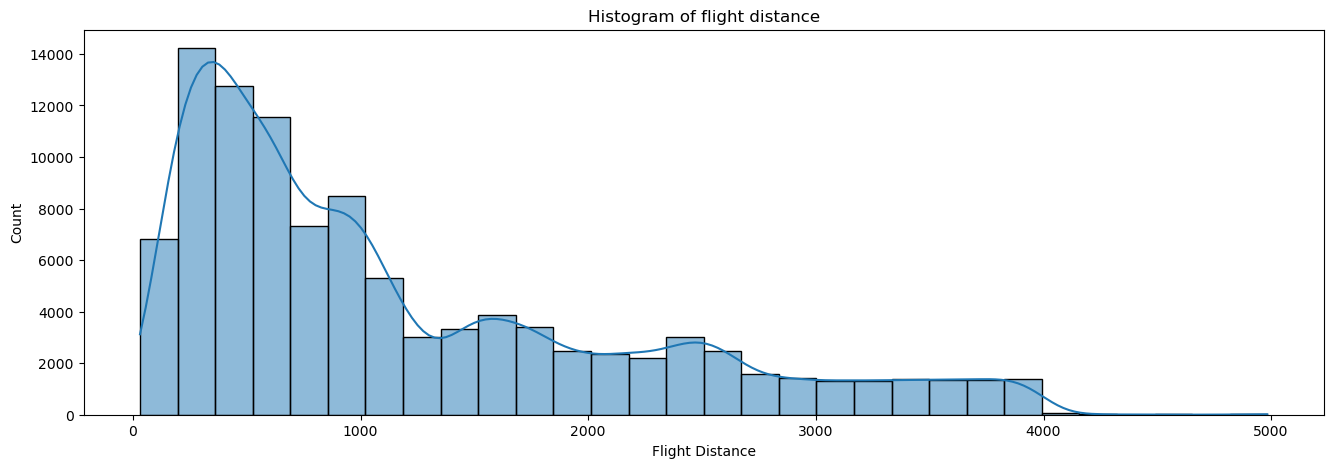

In [14]:
# Creating histogram for Flight Distance
plt.figure(figsize=(16,5)) 
sns.histplot(data['Flight Distance'], kde=True, bins = 30) 
plt.title('Histogram of flight distance') 

From the following histogram we can gather the following insight

1. The distribution of the flight distance is highly positively skewed. meaning that the airline customer usually travel short distance

2. most of the airline customers travel around 300 KM. from this data we can infer that most travel happen domestically

3. customer rarely travel above 3000 km. this means that while the airline mostly does domestic travle they also do international flight but a bit rarely

from the insight of this data we can see that the airline customer mostly travel a small flight rather than long  flight. from this data, we can conclude that most of the airline data is mostly domestic flight with only some international flight. 

## does longer flight distance result in less satisfaction?

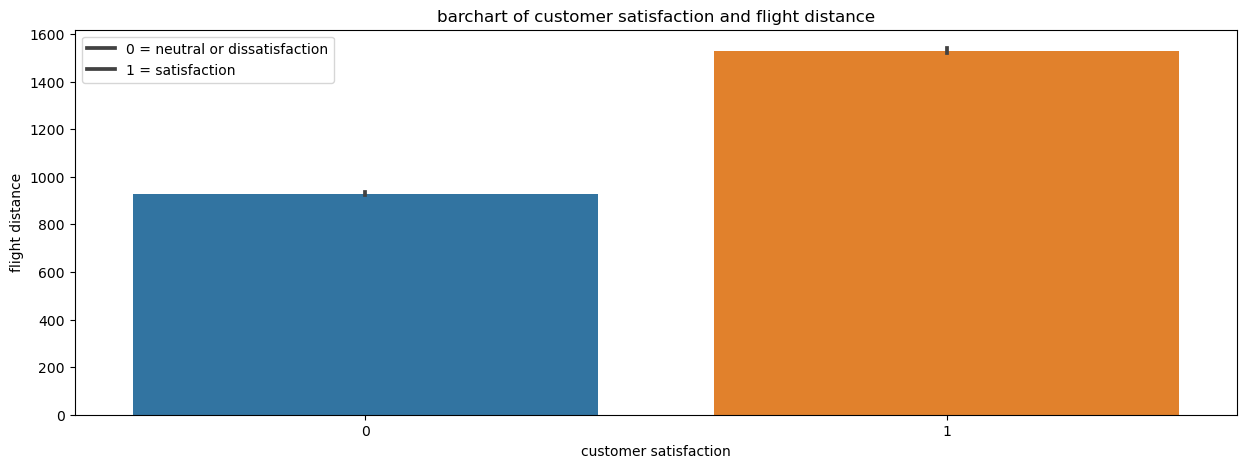

In [15]:
# making barplot for flight distance and satisfaction
plt.figure(figsize=(15,5)) 
sns.barplot(data=data, x='satisfaction', y='Flight Distance',) 
plt.legend(labels=['0 = neutral or dissatisfaction', '1 = satisfaction'])
plt.title('barchart of customer satisfaction and flight distance') 
plt.xlabel('customer satisfaction') 
plt.ylabel('flight distance')
plt.show() 

From the following barchart we can gather the following insight

1. customer with higher flight distance (internationally) at an average of 1500km usually is satisfied with the airline services

2. customer with lower flight distance (domestically) at an average of 900km usually is not satisfied with the airline services

from the insight of this data we can conclude that customer is far more satisfied on long flight distance or international flight rather than shorter distance or domestic flight. we can infer that this happens as the customers that travel internationally usually fly more and have experienced the quality of multiple aircraft compared to people that travel domestically

## overall, is the airline customers satisfied with our service?

Text(0.5, 1.0, 'pie chart for number of satisfied customers')

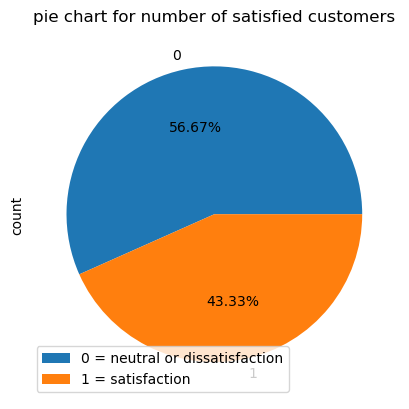

In [16]:
# making pie chart for number of satisfied customers
data['satisfaction'].value_counts().plot(kind='pie', autopct='%.2f%%') 
plt.legend(labels=['0 = neutral or dissatisfaction', '1 = satisfaction'])
plt.title('pie chart for number of satisfied customers')

From the following piechart we can gather the following insight

1. customer are mostly dissatisfied with the current service of the airline at a total of 56.67%

2. despite most customers is dissatisfied with the airline service. the data is almost balanced between satisfied and dissatisfied

from the insight of this data we can conclude that most of the airline consumers are dissatisfied with our current service. this could happen because as we can see from the flight history, most people travel domestically and most domestic flight customer is dissatisfied.

## Are loyal airline customers more satisfied with our services than disloyal ones?

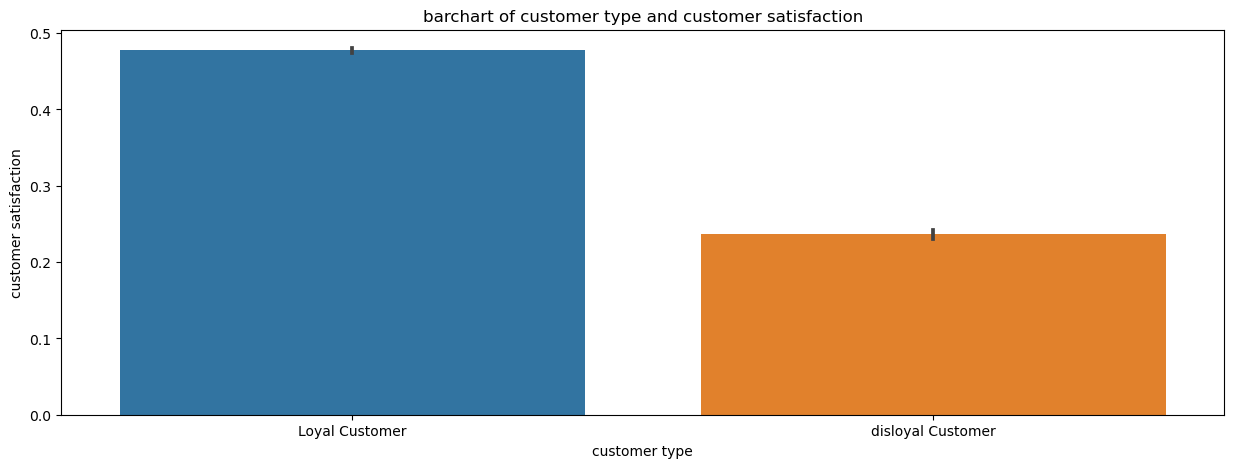

In [17]:
# making bar plot for customer type and satisfaction
plt.figure(figsize=(15,5)) 
sns.barplot(data=data, x='Customer Type', y='satisfaction',) 
plt.title('barchart of customer type and customer satisfaction') 
plt.xlabel('customer type') 
plt.ylabel('customer satisfaction')
plt.show() 

From the following barchart we can gather the following insight

1. loyal customer is usually satisfied with the airline services with an average of around 0.5 satisfaction

2. disloyal customer is usually more dissatisfied with the airline Service with an average of around 0.25 satisfaction

from the insight of this data we can conclude that loyal customer seems to be more satisfied with the airline Service compared to disloyal customer. This could happen as loyal customer can get benefits such as faster queueing and more baggage space.

## does the younger airline customers tend to be more satisfied with our service than older ones?

Text(0, 0.5, 'number of customer')

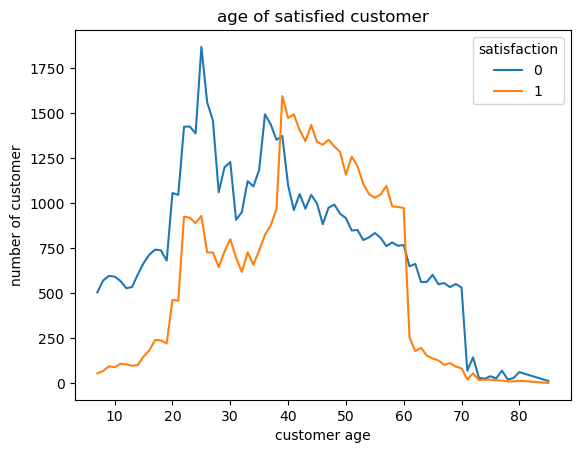

In [18]:
# making line chart from age and satisfaction
sat_type= data.groupby(['Age', 'satisfaction']).size().unstack(fill_value=0) # creating variable to seperate satisfaction based on age
sat_type.plot(kind='line') 
plt.title('age of satisfied customer')
plt.xlabel('customer age') 
plt.ylabel('number of customer') 

From the following linechart we can gather the following insight

1. dissatisfied customer mostly come from customers around the age 25 and become significantly lower at age 40

2. satisfied customer mostly come from customers around the age 40 and become significantly lower at age 60

from the insight of this data we can conclude that most of the dissatisfied review come from younger customer around the age of 25 and significantly lower at the older age of 40 where people start to give more satisfied review. this could happen as younger audience might prioritize feauture such as online booking and wifi which older audience might not care about much and prefer feature such as comfortable seat and legroom

## which class has the highest overall satisfaction?

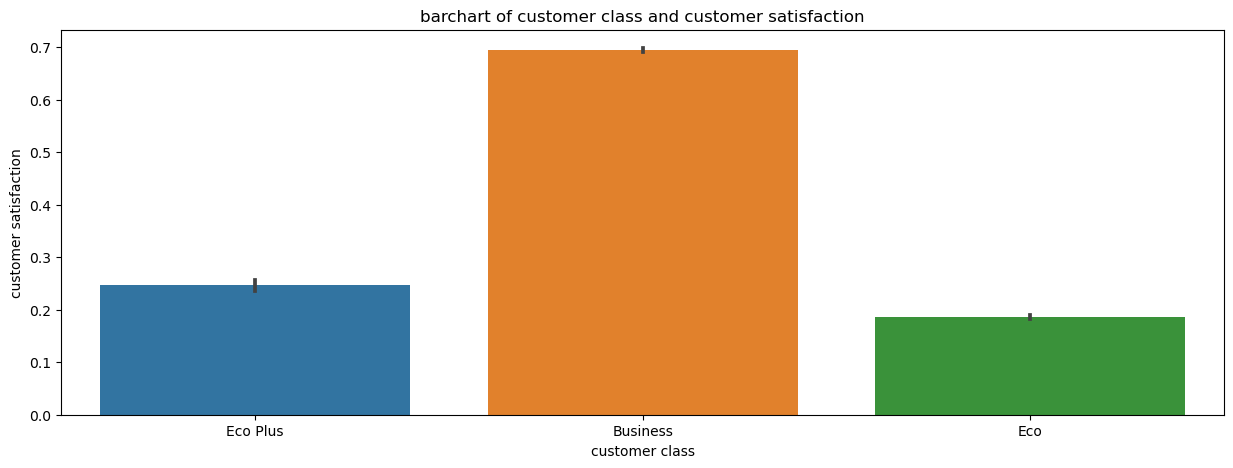

In [19]:
# making the barplot from class and satisfaction
plt.figure(figsize=(15,5)) 
sns.barplot(data=data, x='Class', y='satisfaction',) 
plt.title('barchart of customer class and customer satisfaction') 
plt.xlabel('customer class') 
plt.ylabel('customer satisfaction')
plt.show() 

From the following barchart we can gather the following insight

1. customer in business class significantly have higher satisfaction at an average satisfaction of 0.7 compared to both the economy class

2. customer in economy and economy class have a lower satisfaction at around 0.2 to 0.25

from the insight of this data we can conclude that people in business class usually have higher overall satisfaction compared to both economy class. this could happen as the airline business class usually have extra benefit such as a more comfortable chair, better food and drinks, priority baggage and queue, and more compared to economy or economy plus.

## which type of travel is most popular among the airline Customers?

Text(0.5, 1.0, 'The amount of customer travel purpose')

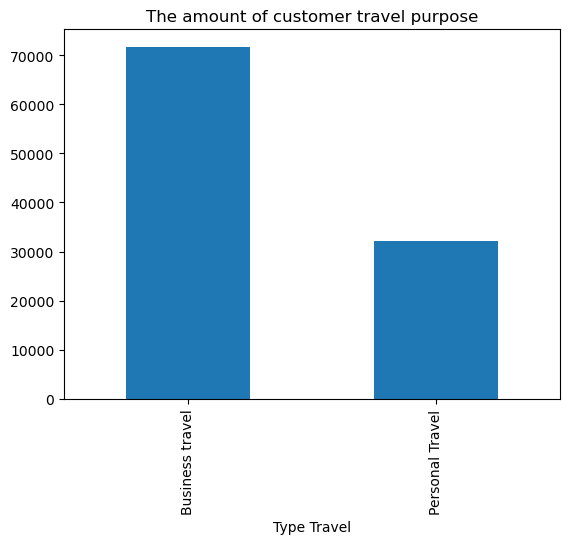

In [20]:
# Making the bar plot for number of customer travel purpose
data['Type Travel'].value_counts().plot(kind='bar') 
plt.title('The amount of customer travel purpose')

From the following barchart we can gather the following insight

1. most of the airline customer use the airline for business travel purpose with around 70000 customers

2. only some of the airline customer use the airline for personal travel purpose with around 35000 customers

from the insight of this data we can conclude that most people use the airline for business travel purposes and rarely uses them for personal travel purpose. This could happen because due to the airline high price, people might pick the airline if their work pay for their travel expense 

# Feature Engineering

In this topic we will prepare the data before creating the prediction model. In this part we will split the data into two, namely feature x and feature y which will be the target, namely the customer satisfaction. Apart from that, we also divide the two features into test and train. After that, we carry out the data cleaning process by handling missing values ​​by dropping the missing values, handling outliers with winorizer, and feature selection using phik. Finally, we carry out normalization by splitting numerical data into 2 categories which is standard for normal distribution and minmax for skewed distribution. also categorical will be split into 3 categories which is ordinal for ordered data, nominal for unordered data, and encoded for data which has been encoded already like the survey answers.

### Part a. Split Feature

In this part we will separate the features x for the features and y for the targer and divide them into test and train data. This is done so we can teach the model about the features of data x and the target of data y so that later the prediction model can be carried out

In [21]:
# separating the x and y feature
X = data.drop('satisfaction', axis=1) # dropping the target column for x file
y = data['satisfaction'] # adding the target to y file

In [22]:
# creating the train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 1) # melakukan split x dan y menjadi x,y test dan x,y train dengan proporsi 25% data pada test dan 75 data pada train

print('Train size X : ', X_train.shape) #melihat besar tabel keempat data setelah split
print('Test size X : ', X_test.shape)
print('Train size Y : ', y_train.shape)
print('Test size Y : ', y_test.shape)

Train size X :  (77928, 22)
Test size X :  (25976, 22)
Train size Y :  (77928,)
Test size Y :  (25976,)


with this code we can see that the dataset of 103904 dataset into 77928 for the train data and the 25976 for the test data

### Part b. Missing Value Handling

In this part we will remove null values ​​in the data. This is because the presence of a null value will make the model unable to function properly. We assume that the type of missing value in this data is missing completely at random (MCAR), which means that the missing data has no relationship with other values. in the context of the dataset, these null value most likely happen due to accident in inputing the data as customer could input 0 if they cannot answer the question in the data

To handle missing values, we will be droping the missing values. This is because the data loss is less than 5% of the data and removing MCAR data does not really affect the inference data

In [23]:
# checking the null value of the dataset
print(X_train.isnull().sum().sum()) 
print(X_test.isnull().sum().sum())
print(y_train.isnull().sum())
print(y_test.isnull().sum())

236
74
0
0


in this code it can be seen that there is a missing value in feature x. so we have to do missing value handling on features x and y

In [24]:
# picking the null value in the x train and test
X_train_nan = X_train[X_train.isnull().any(axis=1)] 
X_test_nan = X_test[X_test.isnull().any(axis=1)]

In [25]:
# deleting the null value of the train and test set
y_train.drop(X_train_nan.index, inplace=True) # deleting the row in feature y where the x feature is null
X_train.dropna(inplace=True)  # delete the row in feature x that have a null value

y_test.drop(X_test_nan.index, inplace=True)
X_test.dropna(inplace=True) 

In [26]:
# checking the shape of the data with deleted null value
print('Train size X : ', X_train.shape)
print('Test size X : ', X_test.shape)
print('Train size Y : ', y_train.shape)
print('Test size Y : ', y_test.shape)

Train size X :  (77692, 22)
Test size X :  (25902, 22)
Train size Y :  (77692,)
Test size Y :  (25902,)


In [27]:
# rechecking that the missing value has been deleted
print(X_train.isnull().sum().sum()) 
print(X_test.isnull().sum().sum())
print(y_train.isnull().sum())
print(y_test.isnull().sum())

0
0
0
0


After the missing value handling has been carried out, it can be seen that the null value in the train and test data has been reduced to 0, meaning that the missing value has been successfully handled

### Part C. Handling Outlier

In this part we will check the skew for trimming and capping. for handling outliers we will use the capping method using winsorizer. we use the outlier handling method of capping because we don't want to drop data because every data is precious and is not worth losing.

In [28]:
# checking the skewness of all numerical data
for i in X_train.select_dtypes(include=np.number).columns.tolist():
    print(f'skewness {i}: {X_train[i].skew()}')

skewness Age: -0.005732136461898762
skewness Flight Distance: 1.1096854465489936
skewness Wifi: 0.03859290896287989
skewness Time Convenient: -0.3355817729288906
skewness Online Booking: -0.01860120580562867
skewness Gate location: -0.05847681463541808
skewness Food and drink: -0.15286322234118851
skewness Online boarding: -0.4567537548109261
skewness Seat comfort: -0.4880206047084835
skewness Inflight entertainment: -0.3668805316990715
skewness On-board service: -0.41838345200668164
skewness Leg room service: -0.3482444757521659
skewness Baggage handling: -0.6767182323373322
skewness Checkin service: -0.36935433827656405
skewness Inflight service: -0.6910699211734037
skewness Cleanliness: -0.3021935430049832
skewness Departure Delay: 6.956865998614049
skewness Arrival Delay: 6.773736927175091


With this code we can see all skewness of the feature that have a numeric type. This is useful for dividing normal distribution and skewed distribution. then the skewed distribution will also be divided into skewed and extremely skewed. despite the data getting all the numeric data type from the dataset. we will not do any outlier handling for encoded categorical as they are not really numerical value

In [29]:
# making the dictionary for normal boundaries
def normal_boundaries(data, variable): 
    avg = data[variable].mean()
    std = data[variable].std()

    up_bound = avg + 3*std
    low_bound = avg - 3*std

    outliers = data[variable][(data[variable]<low_bound) | (data[variable]>up_bound)]
    no_outliers = data[variable][(data[variable]>=low_bound) & (data[variable]<=up_bound)]
    
    percentage_of_outliers = len(outliers)*100/len(data[variable])

    return f'Percentage of outliers {variable}: {len(outliers)*100/len(data[variable]):.2f}%% | upper bound ={up_bound} lower bound ={low_bound}'

with this code we create a dictionary to search for upperbound, lowerbound, and outliers from data that has a normal distribution (skew between -0.5 to 0.5). This is useful for finding the percentage of outliers to see whether outliers need to be capped. This code will be run together with the for loop below

In [30]:
# making the dictionary for skewed boundaries
def skewed_boundaries(data, variable, distance):
    q1 = data[variable].quantile(0.25)
    q3 = data[variable].quantile(0.75)
    iqr = q3 - q1

    upper_bound = q3 + (distance * iqr)
    lower_bound = q1 - (distance * iqr)

    outliers = data[variable][(data[variable] < lower_bound) | (data[variable] > upper_bound)]
    no_outliers = data[variable][(data[variable] >= lower_bound) & (data[variable] <= upper_bound)]

    return f'Percentage of outliers {variable}: {len(outliers)*100/len(data[variable]):.2f}%% | upper bound ={upper_bound} | lower bound ={lower_bound}'

with this code we create a dictionary to search for upperbound, lowerbound, and outliers from data that has a skewed distribution (skewed = -1 < skew < -0.5 or 0.5 < skew < 1 and extremely skewed = below -1 or above 1). This is useful for finding the percentage of outliers to find out whether the data needs to be capped. This code will be run together with the for loop below.

In [31]:
# making a loop to divide the data into 3 (normal distribution, skewed distribution, dan extreme skewed distribution)
for variables in X_train.select_dtypes(include=np.number).columns.tolist():
    skew = X_train[variables].skew()
    if -0.5 <= skew <= 0.5:
       print(normal_boundaries(X_train, variables))
    if (-1 < skew < -0.5) or (0.5 < skew < 1):
        print(skewed_boundaries(X_train, variables, 1.5))
    elif (skew < -1) or (skew > 1):
       print(skewed_boundaries(X_train, variables, 3))
  

Percentage of outliers Age: 0.02%% | upper bound =84.65748611222021 lower bound =-5.970697253650471
Percentage of outliers Flight Distance: 0.00%% | upper bound =5736.0 | lower bound =-3581.0
Percentage of outliers Wifi: 0.00%% | upper bound =6.720990192947456 lower bound =-1.2558457765339255
Percentage of outliers Time Convenient: 0.00%% | upper bound =7.643450930082171 lower bound =-1.519834598928385
Percentage of outliers Online Booking: 0.00%% | upper bound =6.958278337853728 lower bound =-1.4444287780534912
Percentage of outliers Gate location: 0.00%% | upper bound =6.8160781528422305 lower bound =-0.8590684221106231
Percentage of outliers Food and drink: 0.00%% | upper bound =7.194841267086547 lower bound =-0.7838851840921586
Percentage of outliers Online boarding: 0.00%% | upper bound =7.305535325219932 lower bound =-0.8005669887116684
Percentage of outliers Seat comfort: 0.00%% | upper bound =7.39791409433149 lower bound =-0.5097145371055203
Percentage of outliers Inflight ente

with this for loop we use the dictionary previously created to find out the percentage of outliers, upper bound, and lower bound. From this data we see that most of the data has a percentage of outliers of 0% so there is no need for outlier handling. We also would not do handling for encoded categorical data, so those data will not go throught the outlier handling process. For outlier percentages above 0%, capping will be carried out.

In [32]:
# capping the data using winsorizer
outlier_column = ['Age', 'Departure Delay', 'Arrival Delay']

for var in outlier_column:
    skew = data[var].skew()
    if (-0.5 <= skew <= 0.5):
        winsoriser = Winsorizer(
            capping_method='gaussian',
            tail='both',
            fold=3,
            variables=[var],
            missing_values='ignore'
        )
    if (-1 < skew < -0.5) or (0.5 < skew < 1):
        winsoriser = Winsorizer(
            capping_method='iqr',
            tail='both',
            fold=1.5,
            variables=[var],
            missing_values='ignore'
        )
    else:
        winsoriser = Winsorizer(
            capping_method='iqr',
            tail='both',
            fold=3,
            variables=[var],
            missing_values='ignore'
        )
    
    X_train[var] = winsoriser.fit_transform(X_train[[var]])


In this code, we capped the numerical data that has outliers above 0% and is not an encoded categorical. we do this by doing a for loop using winsoriser.

In [33]:
# pengecekan skewness dari semua data numerical
for i in X_train.select_dtypes(include=np.number).columns.tolist():
    print(f'skewness {i}: {data[i].skew()}')

skewness Age: -0.0045161270723468785
skewness Flight Distance: 1.1094656676620138
skewness Wifi: 0.04040802157677806
skewness Time Convenient: -0.3343986321806541
skewness Online Booking: -0.018294273338363996
skewness Gate location: -0.05888941158110646
skewness Food and drink: -0.1512794969916901
skewness Online boarding: -0.4538516953450536
skewness Seat comfort: -0.4827753881598993
skewness Inflight entertainment: -0.3651305876540764
skewness On-board service: -0.420030745122613
skewness Leg room service: -0.35023134460896793
skewness Baggage handling: -0.6770398943760938
skewness Checkin service: -0.3649819607738329
skewness Inflight service: -0.690313957343566
skewness Cleanliness: -0.30007449270576625
skewness Departure Delay: 6.733979510212754
skewness Arrival Delay: 6.596636807462696


After applying the capping method, we can see a reduction in the skewness of the capped data.

### Part D. Feature Selection

In this part we will perform feature selection to delete columns that do not correlate with the target of satisfaction. we will use phi-k which will later be made into a heatmap. The correlation from this heatmap will later be used to determine whether a column should be deleted or not.

In [34]:
# dividing the column into 2 group
column1 = X_train.iloc[:, list(range(0,11))] # getting the 0-10 column
column2 = X_train.iloc[:, list(range(11,22))] # getting the 11-21 column

this code is used to divide the 22 columns in the dataset and divide them into 2 groups of 11 columns. This is done because phi-k cannot perform division with too many columns and it also helps to visualize the heat map

In [35]:
# inserting the target value in satisfaction into the value column 1 dan 2
column1['satisfaction'] = y_train.values # inserting the target satisfaction in column 1
column2['satisfaction'] = y_train.values # inserting the target satisfaction in column 2

we add the target column of satisfaction to both group columns. This is done because we want to do a correlation test with the satisfaction column

In [36]:
# calculating the phik matrix of both column
phik_overview1 = column1.phik_matrix() # phik matrix of column 1
phik_overview2 = column2.phik_matrix() # phik matrix of column 2

interval columns not set, guessing: ['Age', 'Flight Distance', 'Wifi', 'Time Convenient', 'Online Booking', 'Gate location', 'Food and drink', 'satisfaction']
interval columns not set, guessing: ['Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay', 'Arrival Delay', 'satisfaction']


in this code we use the phik matrix to see the correlation of each column in the dataset. To visualize the results, this will be done by creating a heatmap which will be done below.

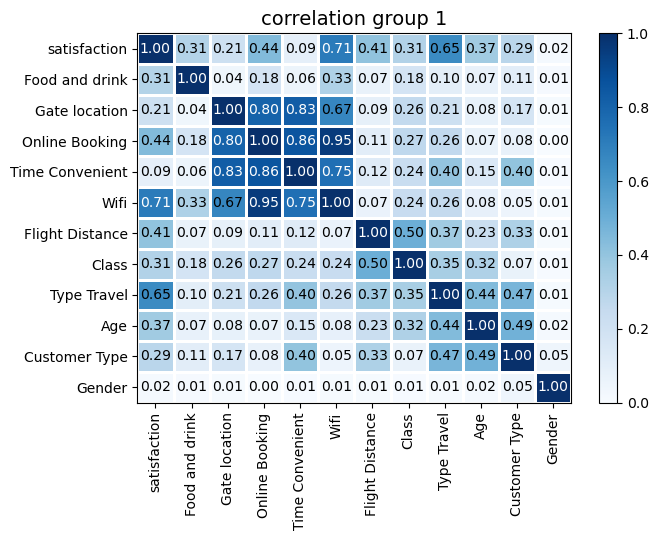

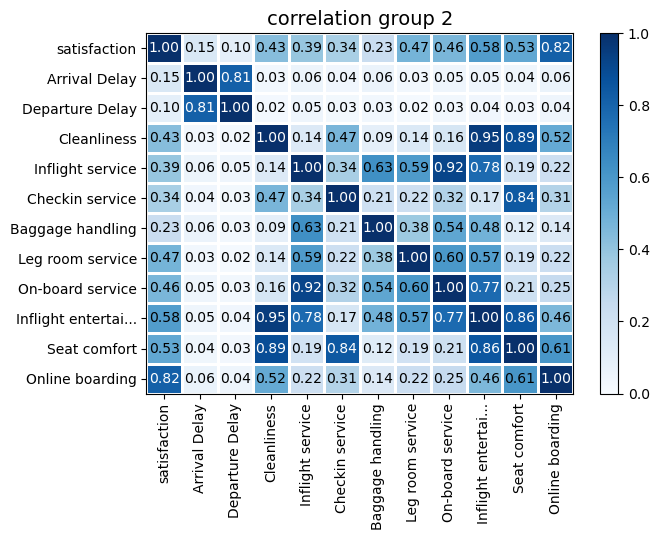

In [37]:
# making the phik matrix into a heatmap
plot_correlation_matrix(phik_overview1.values, x_labels=phik_overview1.columns, y_labels=phik_overview1.index, 
                        vmin=0, vmax=1, color_map='Blues', title=r'correlation group 1', fontsize_factor=1,
                        figsize=(7,5.5)) 
plt.tight_layout() # show the heatmap of column 1

plot_correlation_matrix(phik_overview2.values, x_labels=phik_overview2.columns, y_labels=phik_overview2.index, 
                        vmin=0, vmax=1, color_map='Blues', title=r'correlation group 2', fontsize_factor=1,
                        figsize=(7,5.5))
plt.tight_layout() # show the heatmap of column 2

in this code we create a phik matrix in heatmap form. in this phik result we will take the column that has a correlation with the column satisfaction. In my assumption, the column will be correlated if the value is more than 0.2 so we will take the column that has a correlation value of more than 0.2

In [38]:
# drop feature from train set
X_train.drop(['Time Convenient', 'Gender', 'Departure Delay', 'Arrival Delay'], axis= 1, inplace=True)
# drop feature from test set
X_test.drop(['Time Convenient', 'Gender', 'Departure Delay', 'Arrival Delay'], axis= 1, inplace=True)

in this code we drop features that have a correlation below 0.2. we drop the column for both the x train and test features 

### Part e. Split numerical dan categorical

In this part we will separate numeric and categorical columns in the data that has been dropped. This is useful because the two data types will undergo different normalization methods. Categorical data will be divided into three group, cat_ordinal for ordered data, cat_nominal for unordered or equal data, and cat_encoded for data that has already been encoded and will not have to go through the encoding process anymore. Numerical data is also divided into two group, num_standard for normal distribution data and num_minmax for skewed distribution data. 

Note: we will assume customer type as ordinal data by following this example [Reference](https://www.kaggle.com/code/seguride/airline-passenger-satisfaction-loyal-customer)

In [39]:
# split num col and cat col
num_col_standard = ['Age']
num_col_minmax= ['Flight Distance']
cat_col_ordinal= ['Class', 'Customer Type']
cat_col_nominal = ['Type Travel']
cat_col_encoded = ['Wifi', 'Online Booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 
                   'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 
                   'Inflight service', 'Cleanliness']

print(f'numerical columns standard   : {num_col_standard}')
print(f'numerical columns minmax  : {num_col_minmax}')
print(f'categorical columns ordinal: {cat_col_ordinal}')
print(f'categorical columns nominal: {cat_col_nominal}')
print(f'categorical columns encoded : {cat_col_encoded}')

numerical columns standard   : ['Age']
numerical columns minmax  : ['Flight Distance']
categorical columns ordinal: ['Class', 'Customer Type']
categorical columns nominal: ['Type Travel']
categorical columns encoded : ['Wifi', 'Online Booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']


In [40]:
# adding all categorical column into X_train_cat
X_train_cat_ordinal = X_train[cat_col_ordinal]
X_train_cat_nominal = X_train[cat_col_nominal]
X_train_cat_encoded = X_train[cat_col_encoded]

X_train_cat = pd.concat([X_train_cat_ordinal, X_train_cat_nominal, X_train_cat_encoded], axis=1)



with this code we insert all categorical column of ordinal,nominal, and encoded into one value. this value will be used in order to check the cardinality of all categorical column in the data in the next step

### part f. Cardinality Check

In this part we will perform a cardinality check to see the unique values ​​of all categorical data. in this cardinality check we will categorize values ​​below 5 with low cardinality and values ​​above 15 with too much cardinality.

In [41]:
# performing a cardinality check on the categorical columns
for i in X_train_cat: 
    cardinality = X_train_cat[i].nunique()
    if cardinality <= 5:
        print(f'{i} memiliki cardinality sedikit dengan {cardinality} value unik')
    elif cardinality >= 15:
        print(f'{i} memiliki cardinality banyak dengan {cardinality} value unik')
    else: 
        print(f'{i} memiliki cardinality cukup dengan {cardinality} value unik')

Class memiliki cardinality sedikit dengan 3 value unik
Customer Type memiliki cardinality sedikit dengan 2 value unik
Type Travel memiliki cardinality sedikit dengan 2 value unik
Wifi memiliki cardinality cukup dengan 6 value unik
Online Booking memiliki cardinality cukup dengan 6 value unik
Gate location memiliki cardinality cukup dengan 6 value unik
Food and drink memiliki cardinality cukup dengan 6 value unik
Online boarding memiliki cardinality cukup dengan 6 value unik
Seat comfort memiliki cardinality cukup dengan 6 value unik
Inflight entertainment memiliki cardinality cukup dengan 6 value unik
On-board service memiliki cardinality cukup dengan 6 value unik
Leg room service memiliki cardinality cukup dengan 6 value unik
Baggage handling memiliki cardinality sedikit dengan 5 value unik
Checkin service memiliki cardinality cukup dengan 6 value unik
Inflight service memiliki cardinality cukup dengan 6 value unik
Cleanliness memiliki cardinality cukup dengan 6 value unik


in the cardinality check we can see that most of the encoded categorical has a unique value of 6 while both the ordinal and nominal value have have a unique value of 2 and 3. this means that the amount of cardinality in the dataset is low to average meaning that we dont have to do any high cardinality handling

### part g. feature scaling and encoding

In this part we will do feature scaling and encoding for the dataset. we will do 2 type of scaling and 2 type of encoding. for scaling we will do standard scaler for numerical data with normal distribution and minmax scale for data with skewed distribution. while for encoding we will do onehotencoder for nominal or unordered data and ordinal encoder for ordinal or ordered data. lastly we will not do neither scaling or encoding to the encoded data, so we will passthrough the categorical_encoded data


In [42]:
# performing scaling and encoding process
ct = ColumnTransformer([
    ('scaler', StandardScaler(), num_col_standard),
    ('MinMax', MinMaxScaler(), num_col_minmax),
    ('nominal', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), cat_col_nominal),
    ('ordinal', OrdinalEncoder(categories=[['Eco', 'Eco Plus', 'Business'], ['disloyal Customer', 'Loyal Customer']]), cat_col_ordinal)

], remainder='passthrough')

In this code, we performed standard scaler,minmax scaler,onehot encoder, and ordinal encodder for the splitted numerical and categorical column. This will help in creating a pipeline for model selection in the next part

# Model Definition (with pipeline)

In this part we will carry out model definition by analyzing 6 models: decision tree (dt), random forest (rf), k-nearest neigbour (knn), support vector machine (svc), ada boosting (ada), and xgboosting (xgb). we will define the model using a pipeline to look for cross validation using the f1 score. with the f1 score we try to find the best model from the six models which will later be used for model inference. we choose the f1 score because the f1 score take into account both precision and recall score so that it takes into account false positive and false negative 

In [43]:
# creating the pipeline for all the model
pipe_dt = make_pipeline(ct, DecisionTreeClassifier(random_state=1))
pipe_rf = make_pipeline(ct, RandomForestClassifier(random_state=2))
pipe_knn = make_pipeline(ct, KNeighborsClassifier())
pipe_svc = make_pipeline(ct, SVC())
pipe_ada = make_pipeline(ct, AdaBoostClassifier())
pipe_xgb = make_pipeline(ct, XGBClassifier())

we created a pipeline to include the scaling and encoding, cross validation, and hyperparameter tuning processes in one pipeline to simplify the coding process, simplify the model saving process, and simplify the inference process

In [44]:
# doing the cross validation for each of the model (using 5 fold and f1 score)
cv_dt = cross_val_score(pipe_dt, X_train, y_train, cv=5, scoring='f1', n_jobs=-1)
cv_rf = cross_val_score(pipe_rf, X_train, y_train, cv=5, scoring='f1', n_jobs=-1) 
cv_knn = cross_val_score(pipe_knn, X_train, y_train, cv=5, scoring='f1', n_jobs=-1)
cv_svc = cross_val_score(pipe_svc, X_train, y_train, cv=5, scoring='f1', n_jobs=-1)
cv_ada = cross_val_score(pipe_ada, X_train, y_train, cv=5, scoring='f1', n_jobs=-1)
cv_xgb = cross_val_score(pipe_xgb, X_train, y_train, cv=5, scoring='f1', n_jobs=-1)

in this code we will check the cross val score using the f1 score for the six models. we will do cross validation with 5 fold and n_jobs to use all CPUs in computing

In [45]:
# finding the best model using the loop function
name_model = [] 
cv_score = 0 # value awal mean cross validation score
for cv,name in zip([cv_dt, cv_rf, cv_knn, cv_svc, cv_ada, cv_xgb], # for loop untuk mengecek cross validation ketiga model
                   ['dt','rf','knn','svc','ada','xgb']):

    print(name) # melakukan print nama dan hasil f1 score dari ketiga model
    print(f'f1 - all - cross validation: {cv}')
    print(f'f1 - mean - cross validation: {cv.mean()}')
    print(f'f1 - std - cross validation: {cv.std()}')
    print(f'f1 - range - cross validation: {cv.mean()-cv.std()} - {cv.mean()+cv.std()}')
    print('-'*50)

    if cv.mean() > cv_score: # dilakukan untuk mereplace value cv_score jika mean cv_score lebih tinggi dari sebelumnya
        cv_score = cv.mean() 
        best_model = name
    else:
        pass
        
print(f'Best Model: {best_model}') # print nama model terbaik
print(f'Cross Val mean from best model: {cv_score}') # print cv_score mean tertinggi

dt
f1 - all - cross validation: [0.93610413 0.93347178 0.93482116 0.93471349 0.93623317]
f1 - mean - cross validation: 0.9350687469301452
f1 - std - cross validation: 0.0010164350623698996
f1 - range - cross validation: 0.9340523118677753 - 0.9360851819925151
--------------------------------------------------
rf
f1 - all - cross validation: [0.956063   0.95646926 0.95538613 0.95564273 0.95633122]
f1 - mean - cross validation: 0.9559784663501691
f1 - std - cross validation: 0.0004089117400227218
f1 - range - cross validation: 0.9555695546101464 - 0.9563873780901919
--------------------------------------------------
knn
f1 - all - cross validation: [0.91753207 0.91964559 0.91955944 0.92084352 0.92150742]
f1 - mean - cross validation: 0.9198176075106529
f1 - std - cross validation: 0.0013585209000566284
f1 - range - cross validation: 0.9184590866105963 - 0.9211761284107095
--------------------------------------------------
svc
f1 - all - cross validation: [0.93423525 0.93404608 0.93712395

From the looping results we can see that the f1 score results using xgboosting produces the highest mean F1, namely 0.956. so that model training and inference will be carried out using the xgboosting method

# Model Training

In this process we carry out model training on the best model that we have previously selected by fitting it using xgb or xgboosting

In [46]:
# doing the training model with xgboosting
xgb = pipe_xgb
xgb.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['Age']),
                                                 ('MinMax', MinMaxScaler(),
                                                  ['Flight Distance']),
                                                 ('nominal',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Type Travel']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['Eco',
                                                                              'Eco '
                                                                              'Plus',
                                                                              'Business'],
                                                                             ['disloyal '
                                                                              'Customer'...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

# Model Evaluation

After the model has been trained, we must evaluate the train and test model to determine the fit of the model. we will look at the f1 score from the train and test set, look at the precision - recall - f1 score - accuracy of the train and test results, and look at the confusion matrix from these results. after that we will try to do hyperparameter tuning and see if there is any improvement after doing hyperparameter tuning and compare the two results before and after tuning and choose which one has the best results and which will be used for model predictions

f1 Score - Train Set  :  0.9724180432593306 

Classification Report : 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     43991
           1       0.99      0.96      0.97     33701

    accuracy                           0.98     77692
   macro avg       0.98      0.97      0.98     77692
weighted avg       0.98      0.98      0.98     77692
 

Confusion Matrix      : 


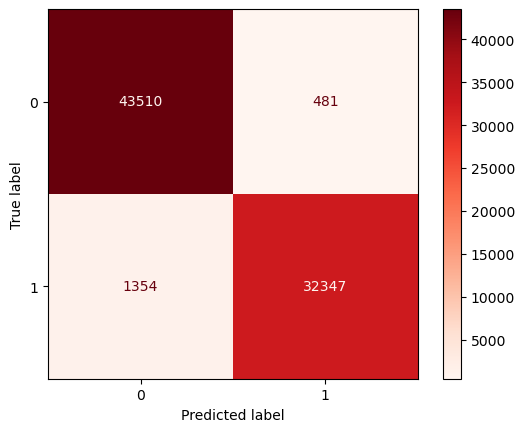

In [47]:
# Performance Model dari Train-Set (sebelum hyperparameter tuning)

y_pred_train = xgb.predict(X_train) # melakukan predict terhadap data train

print('f1 Score - Train Set  : ', f1_score(y_train, y_pred_train), '\n') # melihat f1 score train set
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n') # melihat report dari model
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(xgb, X_train, y_train, cmap='Reds')) # menampilkan confusion matrix

From these results we can see that the f1 score of the train set is 0.97. This indicates that harmonic precision and recall are already very good as the train test is above 80%. This can also be seen from the number of false positives and false negatives in the data, namely 481 false positives and 1354 false negatives. since the f1 score for train is better than 0.8, this means that the data is not underfit

f1 Score - Test Set   :  0.9561633909971923 

Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     14706
           1       0.97      0.94      0.96     11196

    accuracy                           0.96     25902
   macro avg       0.96      0.96      0.96     25902
weighted avg       0.96      0.96      0.96     25902
 

Confusion Matrix      : 


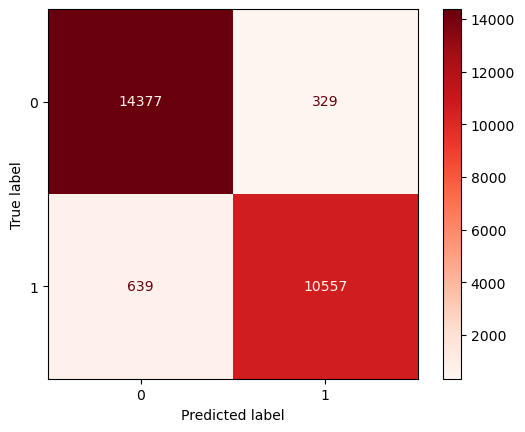

In [48]:
# Performance Model dari Test-Set (sebelum hyperparameter tuning)

y_pred_test = xgb.predict(X_test) # melakukan predict terhadap data test

print('f1 Score - Test Set   : ', f1_score(y_test, y_pred_test), '\n') # melihat f1 score test set
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n') # melihat report dari model
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(xgb, X_test, y_test, cmap='Reds')) # menampilkan confusion matrix

From these results we can see that the F1 score of the test set is 0.95. This indicates that harmonic precision and recall are already very good as they are close to 1. This can also be seen from the number of false positives and false negatives in the data, namely 329 false positives and 639 false negatives. When compared with the train set results, it can be seen that the F1 test set results are a good fit so that it can predict satisfaction accurately.

In [49]:
# extract the false and true positive and negative from the confusion matrix
cm = confusion_matrix(y_test, y_pred_test) # define the confusion matrix

FN_C = cm.sum(axis=0) - np.diag(cm) 
FP_C = cm.sum(axis=1) - np.diag(cm)
TP_C = np.diag(cm)
TN_C = cm.sum() - (FP_C + FN_C + TP_C)

with this code we take values ​​from the confusion matrix column to see how many false negatives, false positives, true positives, and true negatives there are

In [50]:
# getting the first value of the array in confusion matrix
FP = FP_C[0] 
FN = FN_C[0]
TP = TP_C[0]
TN = TN_C[0]

In [51]:
# saving the result of the classification report to a table

all_reports = {} #membuat list report
def performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, name): # creating a dictionary for the classification report
  score_reports = {
      'train - f1_score' : f1_score(y_train, y_pred_train),
      'test - f1_score' : f1_score(y_test, y_pred_test),
      'test - false positive' : FP,
      'test - false negative' : FN
  }
  all_reports[name] = score_reports 
  return all_reports

all_reports = performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, 'Baseline (Default Hyperparameter)') # making the report into a dataframe
pd.DataFrame(all_reports) 

,Baseline (Default Hyperparameter)
train - f1_score,0.972418
test - f1_score,0.956163
test - false positive,329.000000
test - false negative,639.000000


From the previous results, we put the results into a table to make it easier to see the results after hyperparameter tuning which will be carried out in the next part. but overall, before hyperparameter tuning the distance between f1 train and test is already below 5% so before hyperparameter tuning the data can be categorized as good fit

## Hyperparameter Tuning

We can also perform hyperparameter tuning by changing the external configuration of our model, namely xgboosing, to find the best parameters. This is done to improve model performance, namely increasing the f1 score value and reducing false positives or false negatives. for xgboosting we will change 3 parameters, namely eta (shrinks the feature weights), gamma (Minimum loss reduction required to make a further partition on a leaf node of the tree), and max depth (Maximum depth of the tree).

In [52]:
# define the hyperparameter for tuning
eta = [0,0.2,0.4,0.6,0.8,1]
gamma = [0,1,2,3,4,5]
max_depth = [0,1,2,3,4,5]


grid_params =       {   'xgbclassifier__eta': eta, # inserting the parameter for grid search into a dictionary
                        'xgbclassifier__gamma':gamma,
                        'xgbclassifier__max_depth':max_depth,}

grid_params

{'xgbclassifier__eta': [0, 0.2, 0.4, 0.6, 0.8, 1],
 'xgbclassifier__gamma': [0, 1, 2, 3, 4, 5],
 'xgbclassifier__max_depth': [0, 1, 2, 3, 4, 5]}

In [53]:
# doing a gridsearch for xgboosting
xgb_GridSearch = GridSearchCV   (estimator=xgb,
                                 param_grid=grid_params,
                                 cv=5,
                                 n_jobs=-1,
                                 scoring='f1')
xgb_GridSearch.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaler',
                                                                         StandardScaler(),
                                                                         ['Age']),
                                                                        ('MinMax',
                                                                         MinMaxScaler(),
                                                                         ['Flight '
                                                                          'Distance']),
                                                                        ('nominal',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Type '
                                                                          'Travel']),
                                                                        ('ordinal',
                                                                         OrdinalEncoder(categories=[['Eco',
                                                                                                     'Eco '
                                                                                                     'Plus',
                                                                                                     '...
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'xgbclassifier__eta': [0, 0.2, 0.4, 0.6, 0.8, 1],
                         'xgbclassifier__gamma': [0, 1, 2, 3, 4, 5],
                         'xgbclassifier__max_depth': [0, 1, 2, 3, 4, 5]},
             scoring='f1')

We will do a grid search to perform hyperparameter tuning for SVC. we choose to use Gridsearch because the parameters tested are not too large and the results of doing Gridsearch are better than random search because Gridsearch tests all combinations and not just random parameters

In [54]:
# Getting the best parameter
xgb_GridSearch.best_params_

{'xgbclassifier__eta': 0.2,
 'xgbclassifier__gamma': 3,
 'xgbclassifier__max_depth': 0}

we can see in the code that the best paramater is eta:0.2, gamma:3, and max depth:0

In [55]:
# define the best parameter for xgb into xgb_GridSearch_best
xgb_GridSearch_best = xgb_GridSearch.best_estimator_

f1 Score - Train Set   :  0.969349237505662 

Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     43991
           1       0.99      0.95      0.97     33701

    accuracy                           0.97     77692
   macro avg       0.98      0.97      0.97     77692
weighted avg       0.97      0.97      0.97     77692
 

Confusion Matrix      : 


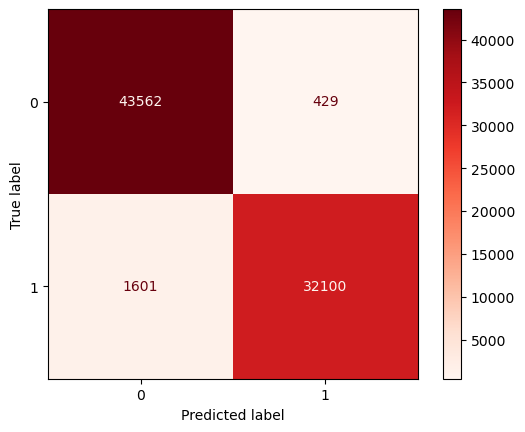

In [56]:
# Performance Model of Train-Set (after hyperparameter tuning)

y_pred_train_Grid = xgb_GridSearch_best.predict(X_train)

print('f1 Score - Train Set   : ', f1_score(y_train, y_pred_train_Grid), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train_Grid), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(xgb_GridSearch_best, X_train, y_train, cmap='Reds'))

From these results we can see that the f1 score of the train set is 0.96. This indicates that harmonic precision and recall are still quite good as the result is still close to 1, but the results are a bit worse than before hyperparameter tuning was carried out as the there is a reduction of f1 score by 0.01 but this reduction is relatively small. from the number of false positives and false negatives from the data, namely 429 false positives and 1601 false negatives, we can also see that there is a reduction in false positive but an increase in false negative. since the f1 score for train is better than 0.8, this means that the data is not underfit

f1 Score - Test Set   :  0.9569330119605257 

Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     14706
           1       0.97      0.94      0.96     11196

    accuracy                           0.96     25902
   macro avg       0.97      0.96      0.96     25902
weighted avg       0.96      0.96      0.96     25902
 

Confusion Matrix      : 


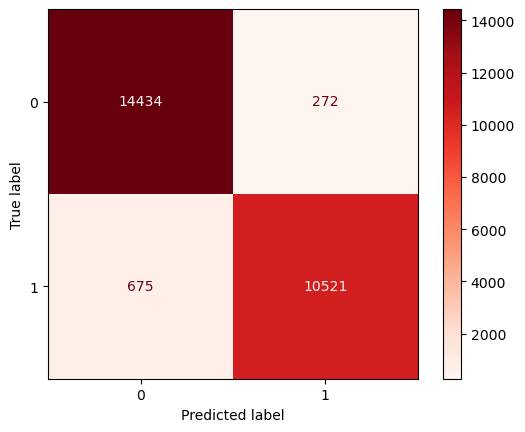

In [57]:
# Performance Model of Test-Set (after hyperparameter tuning)

y_pred_test_Grid = xgb_GridSearch_best.predict(X_test)

print('f1 Score - Test Set   : ', f1_score(y_test, y_pred_test_Grid), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_Grid), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(xgb_GridSearch_best, X_test, y_test, cmap='Reds'))

From these results we can see that the F1 score of the test set is 0.95. This indicates that harmonic precision and recall are still good as score is close to 1, and the results after hyperparameter tuning is increased by 0.0008 a minor increase but an increase overall making the data closer into a goodfit. from the number of false positives and false negatives from the data, namely 272 false positives and 675 false negatives, we can also see that there is a reduction in false positive but an increase in false negative.

In [58]:
# extract the false and true positive and negative from the confusion matrix
cm = confusion_matrix(y_test, y_pred_test_Grid) 

FN_C = cm.sum(axis=0) - np.diag(cm)  
FP_C = cm.sum(axis=1) - np.diag(cm)
TP_C = np.diag(cm)
TN_C = cm.sum() - (FP_C + FN_C + TP_C)

In [59]:
# getting the first value of the array in confusion matrix
FP = FP_C[0] 
FN = FN_C[0]
TP = TP_C[0]
TN = TN_C[0]

In [60]:
# Save Classification Report into a Dictionary

all_reports = performance_report(all_reports, y_train, y_pred_train_Grid, y_test, y_pred_test_Grid, 'Grid Search')
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter),Grid Search
train - f1_score,0.972418,0.969349
test - f1_score,0.956163,0.956933
test - false positive,329.000000,272.000000
test - false negative,639.000000,675.000000


Just like the previous results, we put the results into a table to make it easier to see the results before and after hyperparameter tuning. we can see that after hyperparameter tuning we can see that there is a slight increase in the f1 score of test score. This indicates that the hyperparameter tuning have succeeded in increasing the precision and recall of the test data. despite this, after hyperparameter tuning we can see that there is a decrease of the train score by 0.1 % which indicate a slight worse train data performance but only slightly/ It can also be seen from the table that false positives have decreased by 57 and false negatives have increased by 36. This means that after tuning, our model is better at predicting positive data (people who will give positive comment) than negative data (people who will give negative comment). Overall, after hyperparameter tuning the distance between f1 train and test has descreased meaning the data is generally good fit and slighly better after the hyperparameter tuning

# Save Model

After the model has been evaluated, all required files need to be saved in pickle form which will later be used in the ipynb file and deployment. but because we are using a pipeline, we only need to export the pipeline file.

In [61]:
with open('model_xgb.pkl', 'wb') as file_1:
  pickle.dump(xgb_GridSearch_best, file_1)

# Data Inference

### For the inference please refer to the file P1M2_A.A.Ghifari_inf.ipynb

# Conceptual Problem

### part 1. Explain the background of bagging and how bagging works!

Bagging or boostrap aggregating is a method which combine both bootstraping and aggregation into one model. it is an ensemble learning method that is used to reduce variance within a noisy dataset. bagging is also usefull for imbalanced dataset as it could imporve the stability of model. Bagging consists of 3 main part which is ensemble learning, bootstraping, and aggregation. ensemble learning is combining multiple individual models in order to create a stronger model. bootstraping is sampling the dataset with replacement. and aggregating where the average or a majority of the predictions are taken to compute a more accurate estimate.

The way bagging work is first by selecting a random sample of data in a training set with replacement, after generating several data samples, these models are trained independently on different subset of the training data obtained through bootstraping. then the prediction from each model is combined by averaging for regression and majority voting for classification



### part 2. Explain the difference in how the Random Forest algorithm works and the boosting algorithm you chose!

random forest algorithm is an ensemble learning model where each of the independent model is a decision tree, random forest is an extension of bagging method where it combines multiple decision tree into a single result. random forest algorithm is used in order to add randomness to the model and searching for the best feature among a random subset. while boosting algorithm is an ensemble learning model where each model is focusing on correcting the error of previous model. boosting alhorithm is used in order to reduce errors in predictive data analysis by assigning higher weight to misclassified instances. in this prediction model we uses two boosting algorithm ada boosting and xgboosting. Ada boosting is a boosting algorithm that focuses on correcting error by giving higher weight to misclassified samples and xgboosting is focused more on speed and performance optimization by utilizing parallel processing and regularization techniques

there are some differences between random forest and boosting. first difference is that random forest algorithm is model is built independetly by training model independently on different subset of training data where as boosting algorithm are not independent and are influenced by the performance of the previous model by assigning higher weight to misclassified instances. second difference is that random forest algorithm prediction is combined by averaging for regression and majority voting for classification while boosting algorithm are combined using weighted average.

### part 3. Explain what is meant by Cross Validation!

cross validation is a method used for testing the performance of a machine learning predictive model. it is done by systematically creating and evaluating multiple model on multiple subset of the data using mean and standard deviation which can be used to give a confidence interval on the expected performance in the test set. the way to use cross validation is to first the train set into a number of fold of k, and then for each fold in the train set build the model on k-1 fold and test it against the validation set and repeat until each of the k-fold has served as the validation set. Then the average of the k accuracy will serve as the performance matrix.

# Analysis Model

In making the model, we choose from 6 models, namely decision tree, random forest, support vector machine, K-nearest neighbour, ada boosting, and xgboosting, after doing cross validation using the f1 score we see that xgboosting has the highest mean F1 score so we will use the xgboost model. After carrying out the classification report we can see that f1 train and test have values ​​of 0.97 and 0.95. from this F1 score we can see that the train value is more than 0.80 meaning that the data is not underfit. Other than that, since the difference between train and test is less than 0.05 this means that the data can be concluded to be a good fit. after doing hyperparameter tuning to improve the F1 score, the data increased in f1 test by 0.0008 but lowered the f1 train by 0.003. despite the lowering of the train value the difference is very minimal and the result is more good fit after hyperparameter tuning as the distance between the train and test has been lowered.

After carrying out model definition, training, evaluation, inference, and conceptual problems, we can also see several advantages and disadvantages in the model:

Model advantages:

- from the results of the f1 test and train, we can see that model has a high train and test score with low distance between them. this mean that the model can accurately predict the satisfaction level of customers 

- from the false positive and false negative results after hyperparameter tuning. we can see that it manages to reduce false positive by 57 but increase false positives by 36. this is good as overall the overall false result of the prediction is lowered and thus can give better predictions

model disadvantages:

- there is a reduction in the f1 train which could have been prevented

- the amount of false positive 272 and false negative 675 is still high and could be lowered further

Improvements from the model:

- in hyperparameter tuning, try adding more parameters from xgboosting to see if there is any improvement in F1 score

- try using other methods such as random forest because the mean f1 score between random forest and xgboosting is low

- in the feature selection, we could drop more or less correlated table to see whether it improves the model

With this improvement, hopefully it can be a guide to improve the model to maximize the f1 value and increase the accuracy of the model to predict whether a customer will leave a positive or negative comment.

In [62]:
# Advantages and Disadvantages of the Model
evaluasi = X_test
evaluasi['label'] = y_test
evaluasi['prediction'] = y_pred_test_Grid

# getting the false negative
fn = evaluasi[(evaluasi['label'] == 1) &(evaluasi['prediction'] == 0)]

# getting the false positive
fp = evaluasi[(evaluasi['label'] == 0) &(evaluasi['prediction'] == 1)]

# getting the true negative
tn = evaluasi[(evaluasi['label'] == 0) &(evaluasi['prediction'] == 0)]

# getting the true positive
tp = evaluasi[(evaluasi['label'] == 1) &(evaluasi['prediction'] == 1)]

In [63]:
# viewing the descriptive table of false negative
fn.describe().loc[['mean', '50%', 'min', 'max']]

,Age,Flight Distance,Wifi,Online Booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,label,prediction
mean,38.660741,869.451852,3.657778,3.515556,2.952593,3.201481,3.539259,3.211852,3.179259,3.158519,3.188148,3.371852,3.037037,3.442963,3.154074,1.0,0.0
50%,39.000000,639.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,1.0,0.0
min,7.000000,56.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.0
max,80.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.0,0.0


In [64]:
# viewing the descriptive table of false positive
fp.describe().loc[['mean', '50%', 'min', 'max']]

,Age,Flight Distance,Wifi,Online Booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,label,prediction
mean,37.591912,983.463235,3.819853,3.518382,2.922794,3.246324,3.613971,3.150735,3.360294,3.617647,3.356618,3.772059,3.367647,3.713235,3.180147,0.0,1.0
50%,38.000000,827.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.0,1.0
min,7.000000,90.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.0
max,79.000000,3973.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.0,1.0


# Conclusion

After carrying out the process from problem statement to model analysis, there are several insights that we get from the EDA process to model inference

1. From EDA we can see that most of the airline customer is dissatisfied with the current service of the airline. from the eda we can see that most satisfied customer comes from business class while both economy and economy plus has low satisfaction. this mean we should increase the service quality of economy class as young adult tend to book this class which we also found to have the most dissatisfaction.

2. From Missing values ​​we can see that the missing values ​​from the data are missing completely at random because they filled in the value as blank when they could input 0 if its not applicable. so we infer that it was a mistake in inputing the data as there is no reason why the customer would not state the delay of their flight

3. From outliers we do some outlier handling, although some outliers have an outlier percentage of 0 so there is no need to do outlier handling on the data. we do not do outlier handling for categorical encoded

4. From feature selection we create a heatmap to take columns that have a relationship of more than 0.2 so we will delete the column that has a correlation under 0.2 which is Time Convenient, Gender, Departure Delay, Arrival Delay

5. From the model definition we check six model decision tree, random forest, support vector machine, K-nearest neighbour, ada boosting, and xgboosting. After carrying out calculations using the f1 score, we will use the xgboosting model

6. From the model evaluation, we see that in our prediction model result is close to 1 meaning that the model is a good fit and can acurately predict customer satisfaction

7. From inference data, we can calculate the opportunity for a customer to give a positive or negative comment. for example, using the data in the inference.ipynb file, from this data it can be seen that the customer will give a negative comment

After creating this model we can get several business insights.

1. by using the prediction model created in this notebook, we can predict the chance a customer could give a positive or negative comment to achieve the companys goal of increasing customer retention and positive comment


2. the model can predict whether the customer will leave a positive or negative comment accurately with around 95% accuracy which mean the airline can use this model to help them improve their customer satisfaction to 90% by finding out the factors that affect the customer satisfaction aswell as find out the possible comment and review that they may get from certain survey question

3. From the phik results it can be seen that almost every feature in the survey have a relationship to customer satisfaction so the survey questions are able to calculate customer satisfaction. the only column that has low connection with satisfaction are Time Convenient, Gender, Departure Delay, and Arrival Delay. Companies can look at this information if they want to predict whether a customer will leave a positive or negative comment